In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("Crop_recommendation.csv")
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
import pandas as pd

def get_season(temperature, humidity, rainfall):
    if temperature >= 25:
        if humidity > 70:
            return 'Hot and Humid Summer'
        else:
            if rainfall > 200:
                return 'Hot and Wet Summer'
            else:
                return 'Hot Summer'
    elif 20 <= temperature < 25:
        if humidity > 70:
            return 'Warm and Humid Spring'
        else:
            if rainfall > 150:
                return 'Warm and Wet Spring'
            else:
                return 'Warm Spring'
    elif 10 <= temperature < 20:
        if humidity > 70:
            return 'Cool and Humid Autumn'
        else:
            if rainfall > 150:
                return 'Cool and Wet Autumn'
            else:
                return 'Cool Autumn'
    else:
        if humidity > 70:
            return 'Cold and Humid Winter'
        else:
            if rainfall > 100:
                return 'Cold and Wet Winter'
            else:
                return 'Cold Winter'

df['season'] = df.apply(lambda row: get_season(row['temperature'], row['humidity'], row['rainfall']), axis=1)

print(df)


        N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

                     season  
0     Warm and Humid Spring  
1     Warm and Humid Spring  
2     War

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['season_encoded'] = label_encoder.fit_transform(df['season'])

print(df)

unique_season_encoded = df['season_encoded'].unique()

print("\nSeason Encoding Mapping:")
for encoding in unique_season_encoded:
    season = df.loc[df['season_encoded'] == encoding, 'season'].iloc[0]
    print(f"{encoding}: {season}")


        N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

                     season  season_encoded  
0     Warm and Humid Spring               7  
1     W

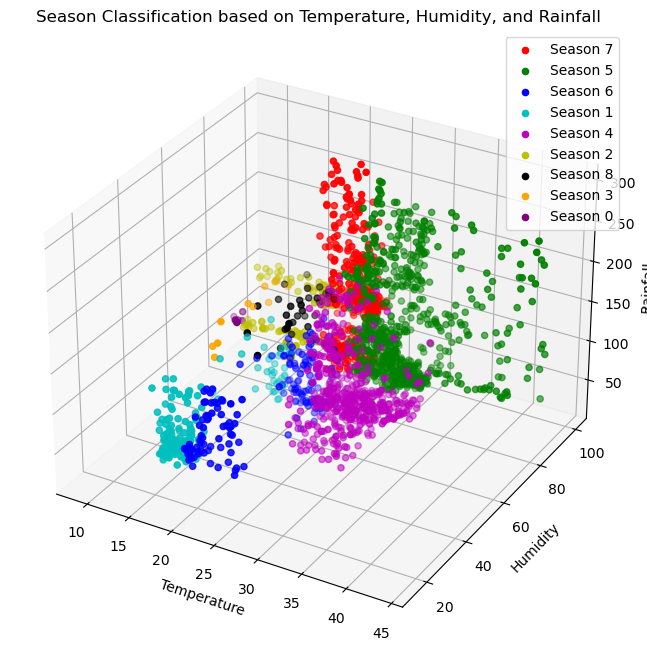

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for season_code, color in zip(df['season_encoded'].unique(), ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple']):
    season_data = df[df['season_encoded'] == season_code]
    ax.scatter(season_data['temperature'], season_data['humidity'], season_data['rainfall'], label=f'Season {season_code}', c=color)

ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Rainfall')
ax.set_title('Season Classification based on Temperature, Humidity, and Rainfall')
ax.legend()

plt.show()


In [9]:
df=df.drop(['season','humidity','rainfall','temperature'],axis=1)
df

,N,P,K,ph,label,season_encoded
0,90,42,43,6.502985,rice,7
1,85,58,41,7.038096,rice,7
2,60,55,44,7.840207,rice,7
3,74,35,40,6.980401,rice,5
4,78,42,42,7.628473,rice,7
...,...,...,...,...,...,...
2195,107,34,32,6.780064,coffee,4
2196,99,15,27,6.086922,coffee,4
2197,118,33,30,6.362608,coffee,8
2198,117,32,34,6.758793,coffee,4


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df = df[['N', 'P', 'K', 'ph', 'season_encoded', 'label']]

X = df[['N', 'P', 'K', 'ph', 'season_encoded']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42)
}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy}")


Accuracy of Decision Tree: 0.8477272727272728
Accuracy of Random Forest: 0.8818181818181818
Accuracy of Support Vector Machine: 0.6090909090909091
Accuracy of K-Nearest Neighbors: 0.6659090909090909
Accuracy of Logistic Regression: 0.6659090909090909


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


df = df[['N', 'P', 'K', 'ph', 'season_encoded', 'label']]

X = df[['N', 'P', 'K', 'ph', 'season_encoded']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [50, 100, 150, 200, 250]}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Best number of estimators: {best_rf.n_estimators}")
print(f"Cross-validated accuracy with best estimator: {best_accuracy}")
print(f"Accuracy on the test set: {accuracy}")


Best number of estimators: 250
Cross-validated accuracy with best estimator: 0.8914772727272726
Accuracy on the test set: 0.8795454545454545


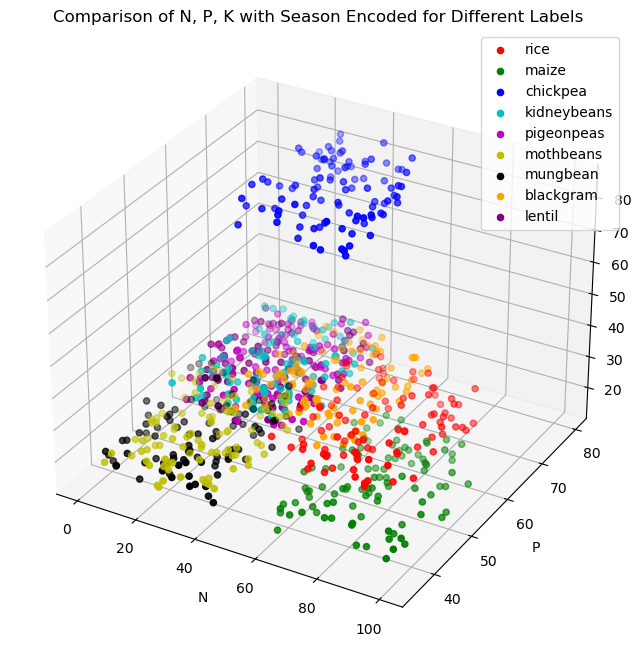

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label, color in zip(df['label'].unique(), ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple']):
    label_data = df[df['label'] == label]
    ax.scatter(label_data['N'], label_data['P'], label_data['K'], c=color, marker='o', label=label)

ax.set_xlabel('N')
ax.set_ylabel('P')
ax.set_zlabel('K')
ax.set_title('Comparison of N, P, K with Season Encoded for Different Labels')
ax.legend()

plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X = df[['N', 'P', 'K', 'season_encoded']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=250, random_state=10)
rf_model.fit(X_train, y_train)

user_input = {
    'N': float(input("Enter N value: ")),
    'P': float(input("Enter P value: ")),
    'K': float(input("Enter K value: ")),
    'season_encoded': int(input("Enter season_encoded value (0-8): "))
}

if user_input['season_encoded'] not in range(9):
    print("Invalid season_encoded value. Please enter a value between 0 and 8.")
else:
    user_input_df = pd.DataFrame([user_input])
    predicted_label = rf_model.predict(user_input_df)[0]

    print(f"The predicted label for the given input is: {predicted_label}")


Enter N value: 10
Enter P value: 20
Enter K value: 30
Enter season_encoded value (0-8): 5
The predicted label for the given input is: coconut


In [15]:
import json

columns = {

'data_columns': [col.lower() for col in X.columns] }

with open("columns.json","w") as f: f.write(json.dumps(columns))

In [16]:
import pickle

with open('rf_crop_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
